# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [4]:
print(citipy)
print(output_data_file)

<module 'citipy.citipy' from 'C:\\Users\\baboo\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>
output_data/cities.csv


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [6]:
response = requests.get(query_url + city.replace(" ","&")).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.88,
        "lon": -109.5
    },
    "dt": 1593484652,
    "id": 5539784,
    "main": {
        "feels_like": 54.41,
        "humidity": 18,
        "pressure": 1010,
        "temp": 69.91,
        "temp_max": 70,
        "temp_min": 69.8
    },
    "name": "Grand",
    "sys": {
        "country": "US",
        "id": 3666,
        "sunrise": 1593431741,
        "sunset": 1593485234,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 16093,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 19.46
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
count_one = 0
count_two = 1

lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []
cityname = []
cloudinesses = []
dates = []
humidities = []

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])

        if count_one > 48:
            count_one = 1
            count_two += 1
            cityname.append(city)
        else:
            count_one += 1
            cityname.append(city)
        print(f"Processing Record {count_one} of Set {count_two} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | baripada
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | dharmadam
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | inuvik
City not found. Skipping...
Processing Record 10 of Set 1 | simbahan
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | mweka
Processing Record 21 of Set 1 | dothan
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | gold coast
City not found. Skipping...
Proc

Processing Record 41 of Set 4 | vila do maio
Processing Record 42 of Set 4 | kismayo
Processing Record 43 of Set 4 | dundalk
City not found. Skipping...
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | palmdale
Processing Record 46 of Set 4 | takoradi
Processing Record 47 of Set 4 | aripuana
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | pelym
Processing Record 1 of Set 5 | tual
City not found. Skipping...
Processing Record 2 of Set 5 | innisfail
Processing Record 3 of Set 5 | lorengau
City not found. Skipping...
Processing Record 4 of Set 5 | ondangwa
Processing Record 5 of Set 5 | nemuro
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | evensk
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | ronne
City not found. Skipping...
Processing Record 10 of Set 5 | olafsvik
Processing Record 11 of Set 5 | bredasdorp
Processing Record 12 of Set 5 | omboue
Processing Record 13 of Set 5 | teruel
Processing Rec

Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | kuopio
Processing Record 36 of Set 8 | rio gallegos
Processing Record 37 of Set 8 | sassandra
Processing Record 38 of Set 8 | dekar
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | grand forks
Processing Record 41 of Set 8 | san policarpo
Processing Record 42 of Set 8 | hassleholm
Processing Record 43 of Set 8 | port victoria
Processing Record 44 of Set 8 | kortkeros
Processing Record 45 of Set 8 | chernyshevskiy
Processing Record 46 of Set 8 | acajutla
Processing Record 47 of Set 8 | luena
Processing Record 48 of Set 8 | lizzano
Processing Record 49 of Set 8 | bonfim
Processing Record 1 of Set 9 | milosesti
Processing Record 2 of Set 9 | peyima
Processing Record 3 of Set 9 | baikunthpur
Processing Record 4 of Set 9 | drakhtik
City not found. Skipping...
Processing Record 5 of Set 9 | cap malheureux
City not found. Skipping...
Processing Record 6 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_df = {"City":cityname, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, "Humidity":humidities, 
               "Lat":lats, "Lng":lngs, "Max Temp":max_temps, "Wind Speed":wind_speeds}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
weather_df.loc[weather_df["Humidity"] <= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,75,CA,1593485950,84,63.75,-68.51,35.60,5.82
1,baripada,24,IN,1593485950,63,21.93,86.72,89.20,1.99
2,mar del plata,20,ES,1593485950,93,43.40,-4.01,62.01,3.65
3,nanortalik,56,GL,1593485951,87,60.14,-45.24,40.23,10.67
4,punta arenas,98,PH,1593485951,66,8.99,125.34,84.58,5.84
...,...,...,...,...,...,...,...,...,...
528,russell,1,US,1593486014,94,32.35,-85.20,86.00,3.80
529,santa elena,29,PH,1593486017,63,17.49,120.43,87.71,9.01
530,xichang,100,CN,1593486017,82,27.90,102.26,68.11,5.70
531,panzhihua,100,CN,1593486017,77,26.59,101.71,72.00,2.55


In [ ]:
#  Get the indices of cities that have humidity over 100%.

# There are no cities with humidity > 100%

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.copy()
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,75,CA,1593485950,84,63.75,-68.51,35.60,5.82
1,baripada,24,IN,1593485950,63,21.93,86.72,89.20,1.99
2,mar del plata,20,ES,1593485950,93,43.40,-4.01,62.01,3.65
3,nanortalik,56,GL,1593485951,87,60.14,-45.24,40.23,10.67
4,punta arenas,98,PH,1593485951,66,8.99,125.34,84.58,5.84


In [36]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

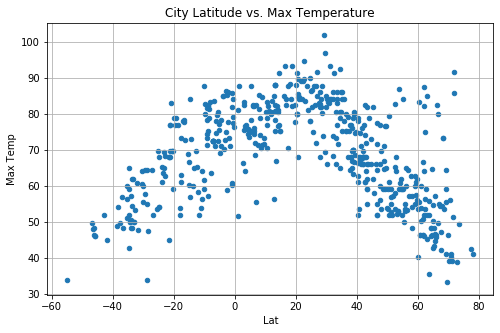

In [37]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

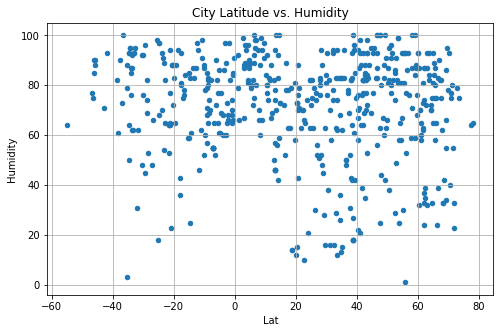

In [38]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

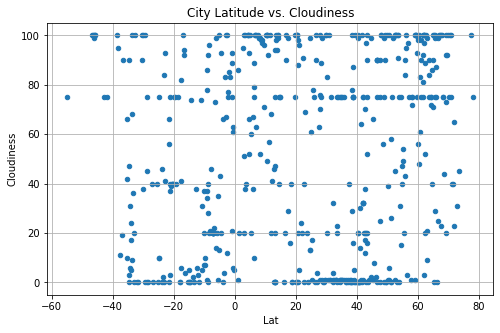

In [39]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

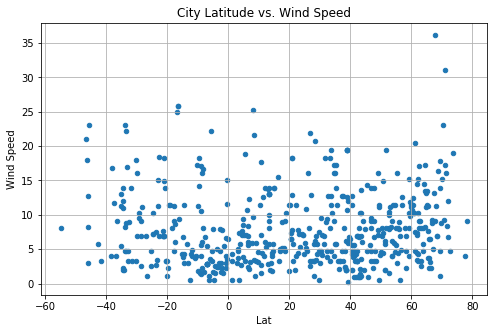

In [40]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression